In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/DS340W')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('ai_job_market_insights.csv')
data.head()

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline


In [ ]:
data.Job_Title.value_counts().sort_values(ascending=False)

,count
Job_Title,
Data Scientist,62
HR Manager,57
Cybersecurity Analyst,55
UX Designer,54
AI Researcher,51
Sales Manager,49
Marketing Specialist,48
Operations Manager,44
Software Engineer,41


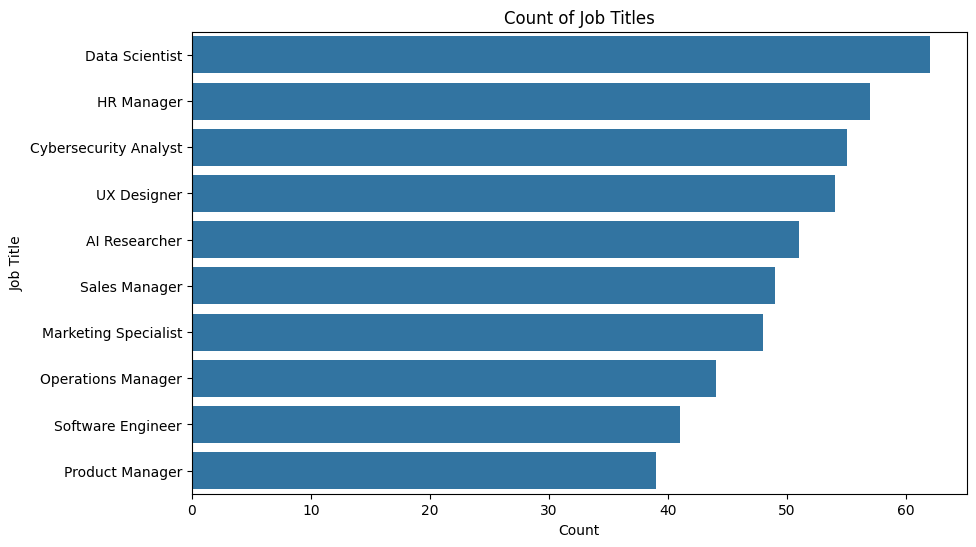

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Job_Title', data = data, order = data['Job_Title'].value_counts().index)

plt.title('Count of Job Titles')
plt.xlabel('Count')
plt.ylabel('Job Title')

plt.show()

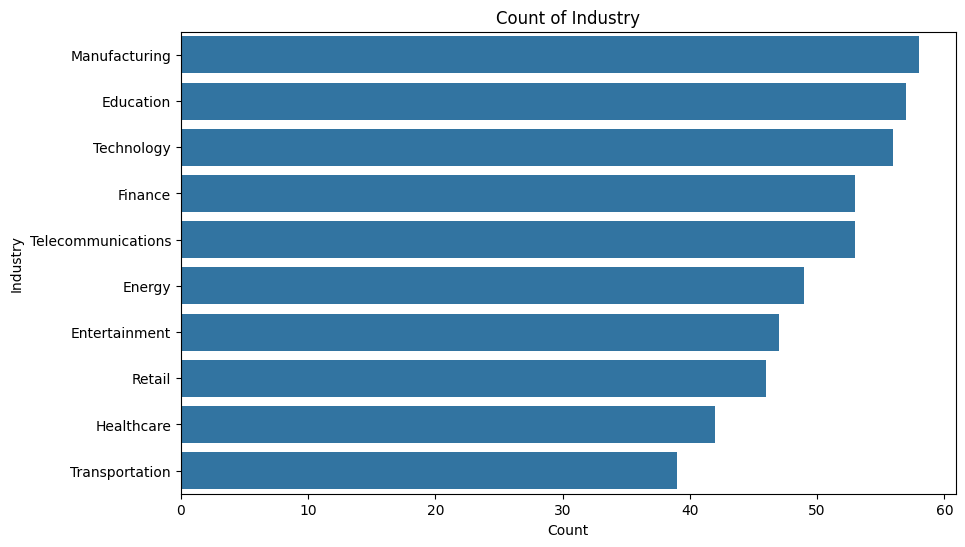

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Industry', data = data, order = data['Industry'].value_counts().index)

plt.title('Count of Industry')
plt.xlabel('Count')
plt.ylabel('Industry')

plt.show()

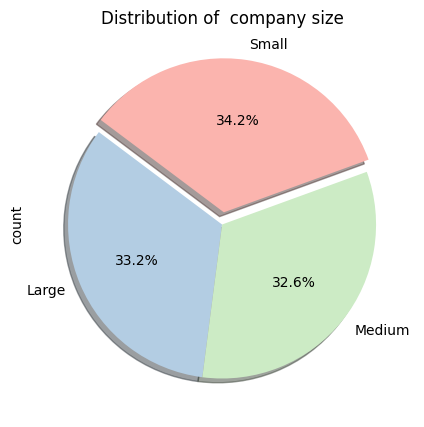

In [ ]:
colors = plt.get_cmap('Pastel1').colors
data["Company_Size"].value_counts().plot(kind='pie', startangle=20 ,autopct='%1.1f%%', figsize=(5,5), title='Distribution of  company size', explode=(0.08,0,0 ) , shadow=True , colors=colors)
plt.show()

**1. Cluster Analysis (using KMeans from scikit-learn)**

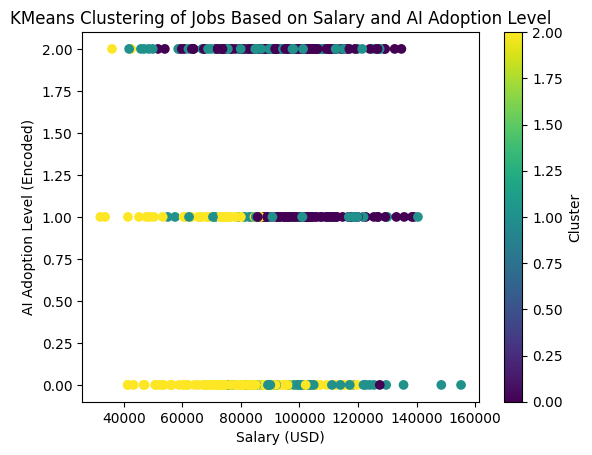

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

# Encode categorical variables (AI_Adoption_Level and Automation_Risk)
le_ai_adoption = LabelEncoder()
data['AI_Adoption_Level_Encoded'] = le_ai_adoption.fit_transform(data['AI_Adoption_Level'])

le_automation_risk = LabelEncoder()
data['Automation_Risk_Encoded'] = le_automation_risk.fit_transform(data['Automation_Risk'])

# Select features for clustering (Salary, AI Adoption Level, Automation Risk)
features = data[['Salary_USD', 'AI_Adoption_Level_Encoded', 'Automation_Risk_Encoded']]

# Standardize the features to normalize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(scaled_features)

# Show resulting clusters
data[['Job_Title', 'Industry', 'Salary_USD', 'AI_Adoption_Level', 'Automation_Risk', 'Cluster']].head()

# Visualizing the clusters based on Salary and AI Adoption Level
plt.scatter(data['Salary_USD'], data['AI_Adoption_Level_Encoded'], c=data['Cluster'], cmap='viridis')
plt.title('KMeans Clustering of Jobs Based on Salary and AI Adoption Level')
plt.xlabel('Salary (USD)')
plt.ylabel('AI Adoption Level (Encoded)')
plt.colorbar(label='Cluster')
plt.show()


**2. Decision Tree (using DecisionTreeClassifier from scikit-learn)**

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('ai_job_market_insights.csv')

# Label encoding for categorical features
le_ai_adoption = LabelEncoder()
data['AI_Adoption_Level_Encoded'] = le_ai_adoption.fit_transform(data['AI_Adoption_Level'])

le_automation_risk = LabelEncoder()
data['Automation_Risk_Encoded'] = le_automation_risk.fit_transform(data['Automation_Risk'])

# Create the target variable y based on Job_Title (1 for AI-related jobs, 0 for others)
y = [1 if 'AI' in title else 0 for title in data['Job_Title']]

# Select features for decision tree classification
X = data[['Salary_USD', 'AI_Adoption_Level_Encoded', 'Automation_Risk_Encoded']]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Print the accuracy score
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.83


**3. MapReduce (using a simplified MapReduce concept)**

In [ ]:
from functools import reduce

# Sample data for MapReduce - Job Titles and Skills
jobs = [
    ('Data Scientist', 'Python'),
    ('AI Engineer', 'Python'),
    ('Machine Learning Engineer', 'Deep Learning'),
    ('Software Developer', 'Java'),
    ('Data Analyst', 'SQL')
]

# Map function - count the occurrences of skills
def map_function(job):
    return (job[1], 1)

# Reduce function - sum up occurrences
def reduce_function(accum, new_value):
    return accum + new_value

# Apply Map and Reduce
mapped = list(map(map_function, jobs))
reduce_result = reduce(lambda x, y: (x[0], reduce_function(x[1], y[1])), mapped)

# Print result
print("Most common skill:", reduce_result)


Most common skill: ('Python', 5)


XGBoost

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Preprocessing
# Encode categorical variables
label_encoders = {}
for column in ['Job_Title', 'Industry', 'Company_Size', 'Location', 'Remote_Friendly', 'AI_Adoption_Level', 'Automation_Risk', 'Job_Growth_Projection']:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Simple encoding for 'Required_Skills' (count number of skills listed)
data['Skills_Count'] = data['Required_Skills'].apply(lambda x: len(x.split(',')))

# Drop the original 'Required_Skills' column
data = data.drop('Required_Skills', axis=1)

# Normalize numerical variables
scaler = StandardScaler()
data[['Salary_USD']] = scaler.fit_transform(data[['Salary_USD']])

# Features and target
X = data.drop('Salary_USD', axis=1)  # Assuming Salary_USD is the target
y = data['Salary_USD']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=100)

# Train the model
xg_reg.fit(X_train, y_train)

# Predictions
y_pred = xg_reg.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse}")

Root Mean Squared Error: 1.091066517261625
